In [1]:
import numpy as np

### Load our pretrained model

In [2]:
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')


### Load our new images and test the autoencoder on this new symbol

In [3]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# load 5 sample images
images = []
for i in range(5):
    img = tf.keras.utils.load_img(f'letter{i+1}.png', target_size=(28, 28), color_mode="grayscale")
    images.append(img)
    
input_arrs = []
for img in images:
    input_arr = tf.keras.utils.img_to_array(img)
    input_arr = input_arr/255  # normalize between 0 and 1
    input_arr = input_arr.reshape(784)
    input_arrs.append(input_arr)

input_arrs = np.array(input_arrs)  # Convert images to a batch of images

predictions = pretrained_model.predict(input_arrs)
print(predictions.shape)


1/1 [==============================] - 0s 185ms/step
(5, 784)


#### Image display

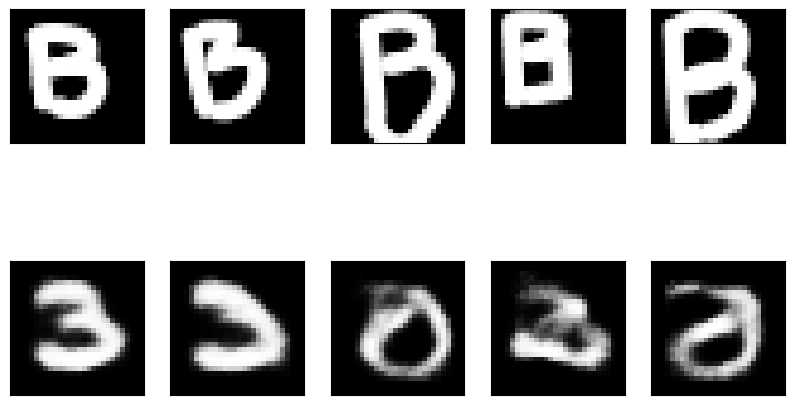

In [12]:
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap="gray")
    
    plt.subplot(2, 5, i+6)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(predictions[i].reshape(28, 28), cmap="gray")

plt.show()

It can be clearly seen that the auto encoder is not performing well with the new symbols

### Try to continue training the model on the original 10 digits and with the new symbol mixed in   

Let's try to retrain the original model with a mix of the new symbols and the original 10. Our goal it so avoid retraining with the entire original test test, and instead only use a small subset of the original test set.

In [16]:
from tensorflow.keras.datasets import mnist

# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for an autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


### Creating bad images and merging them with the trained data



In [21]:

input_arrs = np.array(input_arrs)
bad_images = np.repeat(input_arrs, 16, axis=0)
new_image_set = np.vstack((train_images[:500], bad_images))
np.random.shuffle(new_image_set)

new_images_train = new_image_set[int(len(new_image_set)*.8):]
new_images_test = new_image_set[int(len(new_image_set)*.2):]

from tensorflow import keras
updated_model = keras.models.load_model('initially_trained_autoencoder.h5')

from tensorflow.keras.callbacks import EarlyStopping 

# Train the autoencoder with updated data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = updated_model.fit(
    x=new_images_train, # as inouts and outputs are same for the autoencoder
    y=new_images_train, 
    epochs=20, 
    batch_size=32,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)

Epoch 1/20
4/4 [==============================] - 1s 102ms/step - loss: 0.2038 - val_loss: 0.1789
Epoch 2/20
4/4 [==============================] - 0s 28ms/step - loss: 0.1622 - val_loss: 0.1687
Epoch 3/20
4/4 [==============================] - 0s 26ms/step - loss: 0.1433 - val_loss: 0.1572
Epoch 4/20
4/4 [==============================] - 0s 24ms/step - loss: 0.1298 - val_loss: 0.1455
Epoch 5/20
4/4 [==============================] - 0s 26ms/step - loss: 0.1167 - val_loss: 0.1373
Epoch 6/20
4/4 [==============================] - 0s 26ms/step - loss: 0.1057 - val_loss: 0.1318
Epoch 7/20
4/4 [==============================] - 0s 31ms/step - loss: 0.0963 - val_loss: 0.1256
Epoch 8/20
4/4 [==============================] - 0s 26ms/step - loss: 0.0883 - val_loss: 0.1187
Epoch 9/20
4/4 [==============================] - 0s 32ms/step - loss: 0.0824 - val_loss: 0.1159
Epoch 10/20
4/4 [==============================] - 0s 28ms/step - loss: 0.0788 - val_loss: 0.1129
Epoch 11/20
4/4 [===========

### Test the model on the original test set

313/313 [==============================] - 1s 2ms/step


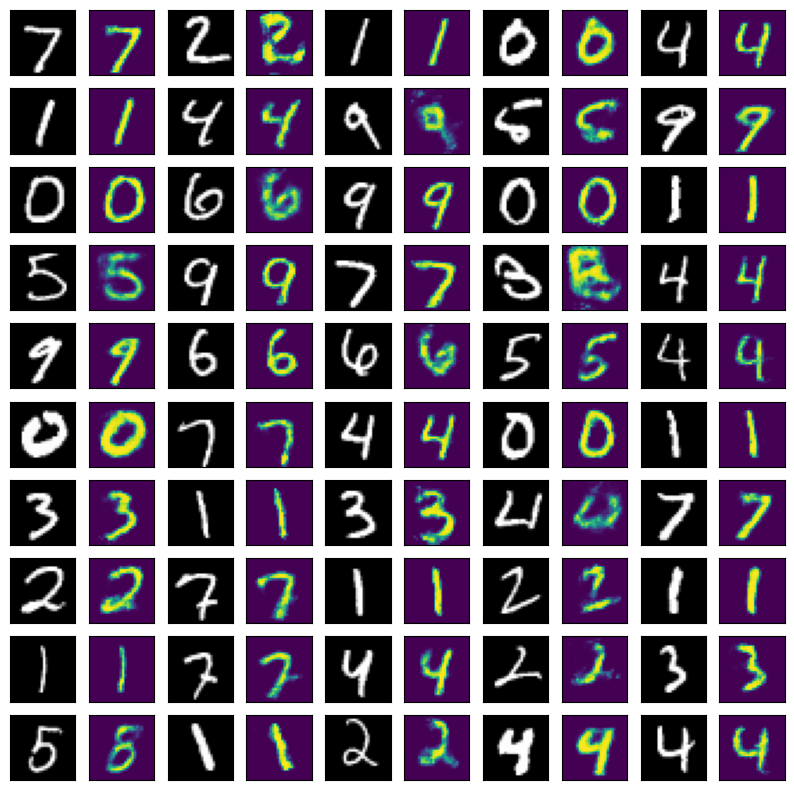

In [22]:

reconstructed_images = updated_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()


### Test the model on the new test set

In [24]:

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt
import numpy as np

# load 5 sample images
images = []
for i in range(5):
    img_path = f'letter{i+1}.png'
    img = tf.keras.utils.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
    images.append(img)
    
# predict the images from this sample
input_arrs = []
for img in images:
    input_arr = tf.keras.utils.img_to_array(img)
    input_arr = input_arr/ 255 # normalize between 0 and 1
    input_arr = input_arr.reshape(784)
    input_arrs.append(input_arr)

input_arrs = np.array(input_arrs)
predictions = updated_model.predict(input_arrs)
print(predictions.shape)

1/1 [==============================] - 0s 28ms/step
(5, 784)


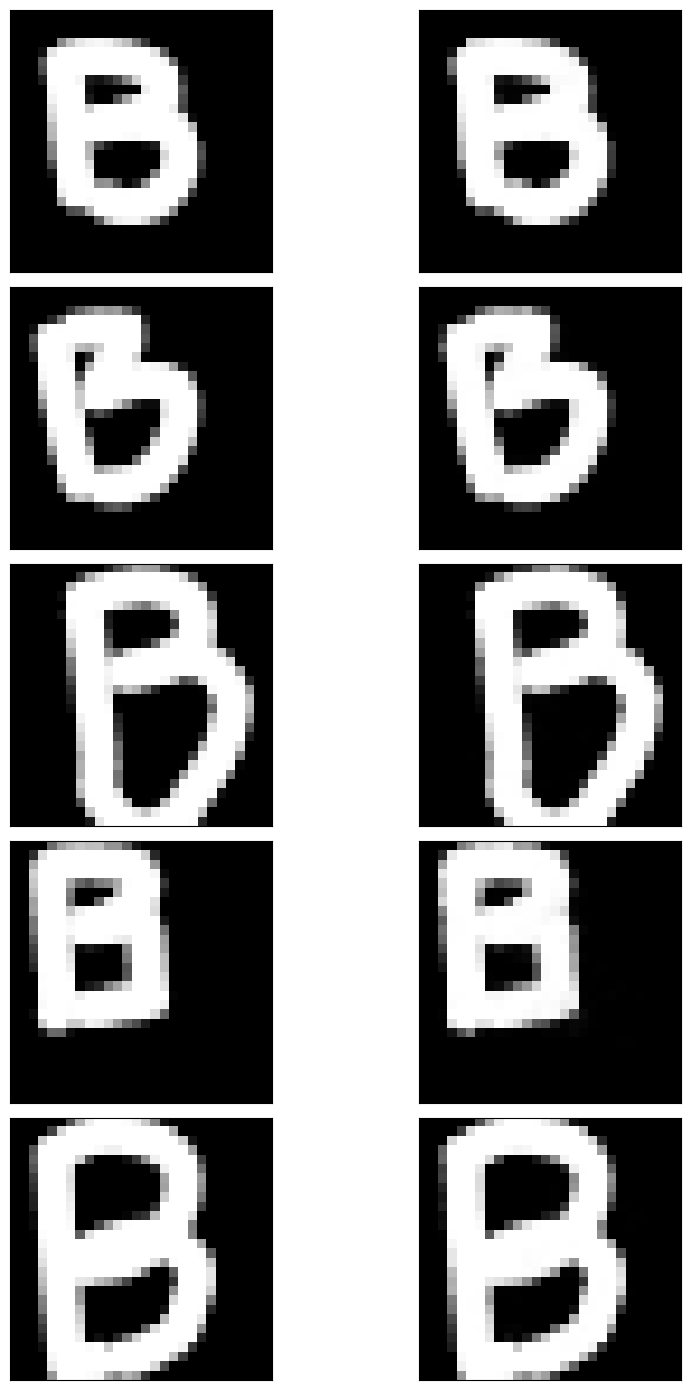

In [28]:
# displaying images side by side
# 
rows = 5
cols = 2
fig, axs = plt.subplots(rows,cols,figsize=(10,14))

for i in range(rows):
    axs[i,0].imshow(images[i], cmap="gray")
    axs[i,0].set_xticks([])
    axs[i,0].set_yticks([])
    
    axs[i,1].imshow(predictions[i].reshape(28,28), cmap="gray")
    axs[i,1].set_xticks([])
    axs[i,1].set_yticks([])
    

plt.tight_layout()
plt.show()

### Save the autoencoder for later user.

In [30]:
updated_model.save('updated_bhanu.h5')

## Conclusion

We can see without a doubt that the auto encoder is capable of foretelling the given images. However, previously it was unable to predict because they were not combined with MIST data. In order to get the appropriate prediction for the provided images, we have trained the provided images, combined them with the mnist data, and then used them to combine with the data. By doing this, we can improve the quality of the prediction, but it will have an impact on our ability to predict the mnist data.